<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 1.4: Metabolomics of athlete performance at high altitude: Polar Dendrogram

<p style="text-align: justify">
<br>
This tutorial covers the necessary steps for producing both a polar dendrogram and the mean peak area plot of each cluster using data from a study on the impact that high altitude has on the performanance of athletes.
</p>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red', size=4>Disclaimer: It is assumed that any data used with this workflow has been cleaned and any missing values either removed or imputed, as this workflow does not perform data cleaning or missing value removal/imputation. 
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), statsmodels (<a href="www.statsmodels.org/">statsmodels.org</a>), Scikit-learn (<a href="scikit-learn.org/">scikit-learn.org</a>), scikits.bootstrap (<a href="github.com/cgevans/scikits-bootstrap">github.com/cgevans/scikits-bootstrap</a>) and Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os

home = os.getcwd() + "/"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.cluster.hierarchy as hierarchy
import multivis

print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak Table</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> tables from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br><br>

This dataset has previously been published in (<a href="https://physoc.onlinelibrary.wiley.com/doi/full/10.1113/EP087159">Lawler et al. (2018)</a>) in <i>Experimental Physiolgy</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>
    
Further information on the publication with a link to the data repository can be found here: Project ID <a href="XXX">XXX</a>). 

Please inspect the <a href="Altitude_Data.xlsx">Altitude_Data.xlsx </a>Excel file before using it in this tutorial to understand its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'Altitude_Data.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="Altitude_Data.xlsx">Altitude_Data.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'Altitude_Data.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading table: Peak
Loading table: Data
TOTAL SAMPLES: 29 TOTAL PEAKS: 32
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table

Check the Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>
</div>

In [3]:
display(DataTable)

,Idx,Class,SampleID,M1,M2,M3,M4,M5,M6,M7,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
1,1,Day1,ID#8,11869.885789,7928.191086,10435.615600,24274.490844,1.652528e+06,5.527597e+05,3302.626974,...,8821.868440,45452.021662,8.422674e+05,35812.954717,11908.058199,58304.192636,76229.516925,698.829269,6.152166e+06,3.011384e+05
2,2,Day3,ID#9,6091.032382,336302.294432,7583.153313,15992.455361,1.014382e+06,5.398275e+05,2561.396590,...,7070.409466,23748.717737,5.969310e+05,43209.005653,1614.750726,17107.605509,33792.399242,5219.808748,3.844697e+06,3.876507e+05
3,3,Day14,ID#10,8304.840762,91992.628406,15463.843074,17243.287685,1.261087e+06,6.358351e+05,2579.520637,...,6189.891266,62171.092488,4.617908e+05,19891.976258,5787.252806,21196.689803,49518.409732,6917.767103,3.642466e+06,3.085592e+06
4,4,Day1,ID#4,5679.245738,103604.360972,11726.584477,18997.946320,1.730119e+06,8.018186e+05,1862.338814,...,14710.768208,29470.036797,6.338633e+05,54690.964915,6119.355667,34562.628959,25722.056666,82857.001884,6.507678e+06,4.544997e+05
5,5,Day3,ID#3,7927.719880,377994.409342,37252.855940,23070.362098,2.172443e+06,8.122617e+05,2368.612424,...,8373.694858,70177.184112,5.764836e+05,119391.571698,5831.690401,11314.289830,27222.497589,8780.422655,5.452713e+06,3.675841e+05
6,6,Day14,ID#3,4074.580486,9234.118904,2883.602638,27252.577493,1.694014e+06,3.198403e+05,2436.745786,...,17175.921137,43648.210575,3.669026e+05,41311.727090,20909.038093,14625.381528,61184.204465,2386.211484,3.958768e+06,7.036890e+05
7,7,Day3,ID#2,7120.333141,98285.350473,14214.077514,24997.653286,1.421475e+06,6.981114e+05,3576.187472,...,11930.411039,33482.365703,7.695907e+05,17285.765486,4002.855161,18389.688133,54971.306524,1266.178495,4.396494e+06,5.522302e+05
8,8,Day3,ID#4,8103.250066,31683.902081,8928.894882,20545.072813,1.655281e+06,3.886826e+05,3023.746753,...,9760.323565,24682.407167,6.951134e+05,33854.620792,5749.788807,13098.908274,32455.790304,13672.154888,3.771656e+06,1.186001e+06
9,9,Day14,ID#8,8273.693156,382598.960254,4154.972730,22212.782829,1.891639e+06,8.915732e+05,2310.807344,...,11142.048186,50927.179351,6.828179e+05,169428.675064,5179.873860,14255.030832,63933.849462,2019.496191,3.703559e+06,4.964483e+05
10,10,Day3,ID#10,6690.535074,98946.804580,5388.740427,14757.880513,1.370226e+06,6.644797e+05,2577.400534,...,10905.284099,30077.046114,6.620947e+05,44494.246759,5019.971982,9310.215496,32246.148489,455.958833,3.207303e+06,3.559986e+05


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table

Check the Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
display(PeakTable)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,Dratio
1,1,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,2.887221
2,2,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,24.314863
3,3,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,3.216742
4,4,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,4.025602
5,5,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,2.417115
6,6,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,2.332534
7,7,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,1.564374
8,8,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,7.463177
9,9,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,3.480650
10,10,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,4.942172


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Statistical analysis

Statistical analysis is important to identify any features or samples which may be outliers. 
It is also important to identify whether the data is normally distributed prior to any further analysis such as correlation analysis. Whether the data is normally distrubuted or not can determine the most suitable correlation function to use. For example the parametric method Pearson's correlation should be used for normally distributed data, whereas the non-parametric method Spearman's correlation is suitable for non-normally distributed data.

Statistical analysis can also provide additional univariate information for futher down-stream visualisations, such as one-way Anova p-values and PCA loadings for each feature to be represented for each of the nodes in the spring-embedded network plot or other visualisation methods. In this way the network visualisation can considered a multivariate clustering method.
</div>

In [5]:
stats = multivis.utils.statistics(PeakTable, DataTable)

stats.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data to unit variance (default: False)
                impute_data: Impute any missing values using KNN impute with a set number of nearest neighbours (default: (False, 3))
                group_column_name: The group column name used in the datatable (default: None)
      

In [6]:
params = dict({'parametric': True
              , 'log_data': (True, 2)
              , 'scale_data': True
              , 'impute_data': (True, 3)
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Day1'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': False
              , 'group_missing': False
              , 'pca_loadings': False
              , 'normality_test': True
              , 'group_normality_test': False
              , 'group_mean_CI': False
              , 'group_median_CI': False
              , 'mean_fold_change': False
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': False
              , 'mann_whitney_u_test': False})

stats.set_params(**params)

PeakTableStats = stats.calculate()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table with statistical information: Shapiro-Wilk's pvalue

Check the imported Peak table with statistical information by simply calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableStats)</span><br>
</div>

In [7]:
display(PeakTableStats)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,Dratio,Shapiro_statistic,Shapiro_pvalue
0,0,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,2.887221,0.964668,4.256912e-01
1,1,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,24.314863,0.880608,3.469454e-03
2,2,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,3.216742,0.962037,3.686095e-01
3,3,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,4.025602,0.912227,1.946390e-02
4,4,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,2.417115,0.653896,4.894235e-07
5,5,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,2.332534,0.983205,9.110454e-01
6,6,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,1.564374,0.971145,5.911328e-01
7,7,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,7.463177,0.986695,9.662158e-01
8,8,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,3.480650,0.961392,3.555631e-01
9,9,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,4.942172,0.952579,2.134403e-01


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Determine if the data is normally distributed

If the majority of the data shows a Shapiro-Wilks pvalue > 0.05 the data is normally distributed and parametric statistical analysis is recommended, however if the pvalue is < 0.05 then the data is non-normally distributed and non-parametric analysis methods are recommended.
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features normally distributed

In [8]:
display(len(PeakTableStats.query('Shapiro_pvalue > 0.05')))

24

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features non-normally distributed

In [9]:
display(len(PeakTableStats.query('Shapiro_pvalue < 0.05')))

8

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Normality conclusion

The data is normally distributed and therefore parametric analysis (e.g. one-way Anova, T-test, Pearson's correlation etc) is recommended.

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Log transform prior to HCA and polar dendrogram
    
Transformation can be done with a log which is commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. Scaling is highly dependent on the values found in the dataset. If the dataset contains a number of values which are very large compared to the majority of other values, then this may skew the data in favour of those values and consequently bias the results. Scaling methods such as unit variance scale all the values in the dataset so that they all values are comparable. Pearson correlation, a parametric method, is performed next where a log is necessary to normally distribute the data. However, if a non-parametric method was used, such as Spearman or Kendall's Tau, then log is not necessary. Additionally, also in this case no scaling is necessary after log transformation, as correlation analysis does not require scaling, as covariance is measured between individual values in the bivariate correlation analysis, unlike with PCA in tutorial 1.1, which performs multivariate analysis, measuring the variance across all values. However, if another similarity metric were to be used in place of correlation, such as Euclidean distance, then scaling may be a necessary step to take.

</div>

In [10]:
peaklist = PeakTable['Name']                        # Set peaklist to the metabolite names in the DataTableClean
X = DataTable[peaklist]                             # Extract X matrix from DataTable using peaklist
Xlog = np.log10(X)                                  # Log transform (base-10)
#Xscale = multivis.utils.scaler(Xlog)               # Scale to unit variance (not necessary if later performing correlation analysis)

DataTableLogged = pd.merge(DataTable.T[~DataTable.T.index.isin(PeakTable['Name'])].T.reset_index(drop=True), pd.DataFrame(Xlog, columns=peaklist).reset_index(drop=True), left_index=True, right_index=True)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 5. Correlation analysis

Correlation is a form of similarity and measures the strength of the linear relationship between two variables. Pearson's correlation, a form of parametric correlation analysis, is described mathematically by dividing the joint variability or covariance of two variables by the product of their standard deviations (see Eq1). Other forms of correlation measure the monotonic relationships and are non-parametric, such as Spearman’s rank correlation and Kendall Tau's correlation. The following correlation analysis, allows for Pearson, Spearman or Kendall Tau's correlation analysis.

\begin{equation*}
r = \frac{Cov(X,Y)}{SD(X).SD(Y)}
\end{equation*}
<center>Eq1: Pearson’s correlation coefficient</center>

</div>

In [11]:
correlationType = "pearson"; #"spearman"; "kendalltau"

X = DataTableLogged[PeakTableStats['Name']]

Scores,Pvalues = multivis.utils.corrAnalysis(X, correlationType)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 283.12it/s]


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 6. Hierarchical Cluster Analysis (HCA)

Hierachical Cluster Analaysis (HCA) orders variables by similarity and then performs clustering based on the similarities/disimilarities of the samples and features in the data, and then clusters them using a linkage cluster method. If the data is correlated the correlations are first preprocessed and then clustered, otherwise a distance metric is applied to non-correlated data before clustering. If instead Euclidean or another distance metric is used in place of correlation, then scaling may be necessary prior to this step.

</div>

In [12]:
distance_metric = "none" #"euclidean"; #"correlation" # Applied only to non-correlated data
transpose_non_correlated = True; # Transpose data if it is not a correlation matrix
is_correlated = True; # Specficy if input data is a correlation matrix
linkage_method = "ward";

matrix,row_linkage,col_linkage = multivis.utils.cluster(Scores, transpose_non_correlated, is_correlated, distance_metric, linkage_method)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 7. Generate a cartesian dendrogram

Dendrograms or tree diagrams are a means to visually depict the hierarchical structure of the similarities or dissimilarities between individuals derived from HCA. The distances between branches in the dendrogram represent the similarities between individuals. The following cartesian dendrogram is generated from the row linkage data from the HCA in step 5.

</div>

In [13]:
color_threshold = 1;

hierarchy.set_link_color_palette(['green', 'red', 'cyan', 'magenta', 'yellow', 'blue', 'black', 'orange'])
#hierarchy.set_link_color_palette(['g', 'r', 'c', 'm', 'y', 'b', 'k', 'w'])
#hierarchy.set_link_color_palette(None)

dn = hierarchy.dendrogram(row_linkage, labels=list(PeakTable.index), no_plot=True, color_threshold=color_threshold)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 8. Plot Polar dendrogram

A polar dendroam is simply a circular form of the cartesian dendrogram from step 6, allowing for more information from the dendrogram to be displayed in a small space for easier visualisation.

</div>

In [14]:
polarDendro = multivis.polarDendrogram(dn)

polarDendro.help()

Produces a polar dendrogram given a cartesian dendrogram

            Initial_Parameters
            ----------
            dn :  Dendrogram dictionary labelled by Peak Table index.

            Methods
            -------
            set_params : Set parameters -
                imageFileName: The image file name to save to (default: 'polarDendrogram.png')
                saveImage: Setting to 'True' will save the image to file (default: True)
                branch_scale: The branch distance scale to apply ('linear', 'log', 'square') (default: 'linear')
                gap: The gap size within the polar dendrogram (default: 0.1)
                grid: Setting to 'True' will overlay a grid over the polar dendrogram (default: False)
                style: Set the matplotlib style (see https://matplotlib.org/stable/tutorials/introductory/customizing.html) (default: 'seaborn-white')
                transparent: Setting to 'True' will make the background of all plots transparent (default: 

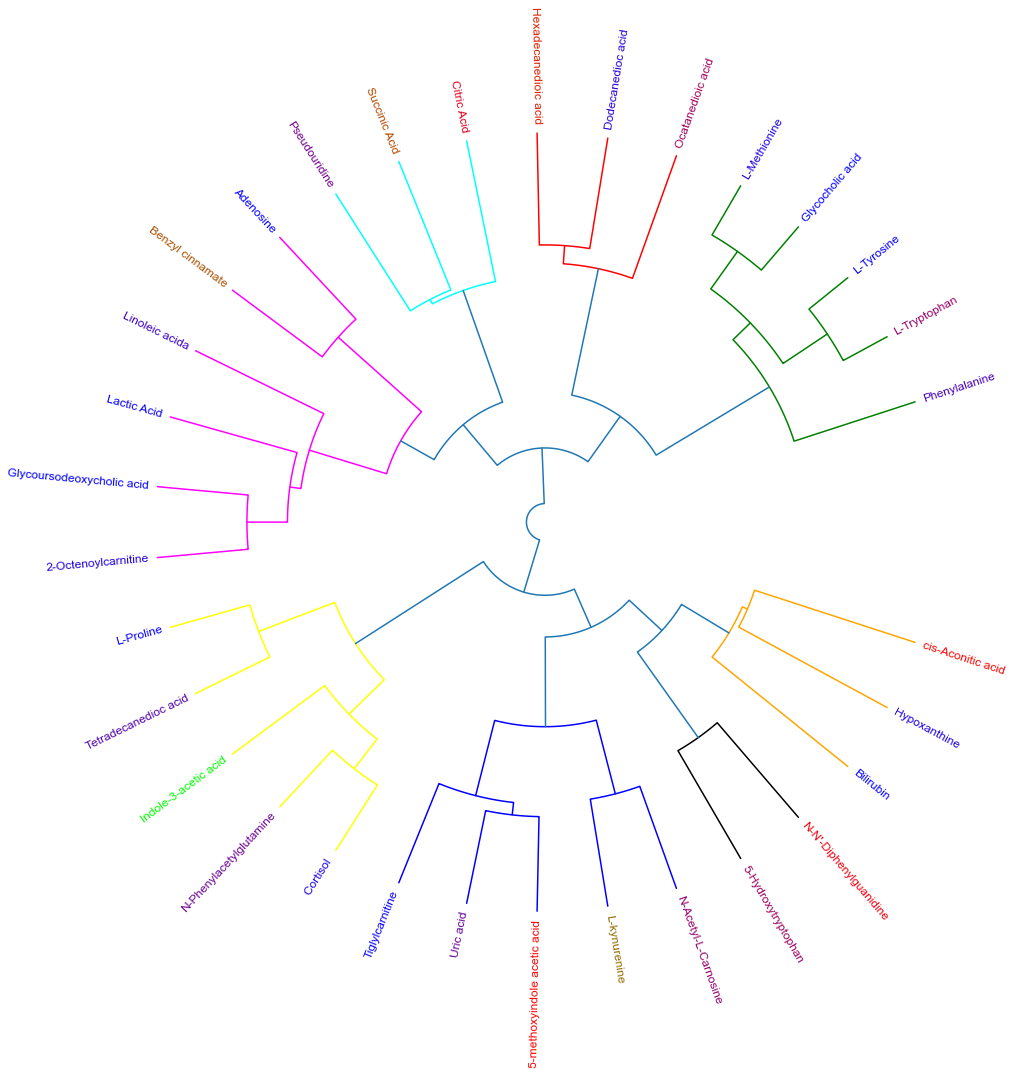

In [15]:
text_params = dict({'fontSize': 12
                    , 'textColorScale': 'linear'         #The scale to use for colouring the text
                    , 'text_color_column': 'pvalue'      #If text_color_column set to colour values it overides the use of text_cmap
                    , 'label_column': 'Label'            #The column to label the branches by
                    , 'text_cmap': 'brg'})               #The colour map to use for the labels

general_params = dict({'imageFileName': 'polarDendrogram_altitude_study.png'    #File name to save image to
                       , 'PeakTable': PeakTable                  #The Peak Table
                       , 'DataTable': DataTable                  #The Data Table
                       , 'group_column_name': 'Class'            #The group column name used in the datatable (e.g. 'Class')
                       , 'saveImage': True                       #If setting to 'True' saves the image
                       , 'branch_scale': 'linear'                #Scale factor for the branches ('linear', 'log', 'square')
                       , 'gap': 0.1                              #Gap size within polar dengrogram
                       , 'grid': False                           #Overlay a grid over the polar dendrogram           
                       , 'style': 'seaborn-white'                #Matplotlib style to apply
                       , 'transparent': False                    #If 'True' sets the background of all plots to transparent
                       , 'dpi': 200                              #The DPI of the image
                       , 'figSize': (15,15)})                    #Figure size (width,height)

polarDendro.set_params(**general_params,**text_params)

polarDendro.build()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 9. Plot Peak Area of each cluster

The mean or median peak area of features within each cluster is plotted to show and compare their trajectories. An option to find the mean or median peak area, log ('natural', base 2 or base 10), scale the data to unit variance, and impute the data using KNN (to a set number of neighrest neighbours) and save the resulting image is provided. The clusters are labelled alphabetically anti-clockwise from the polar dendrogram.
    
Note1: if the data is normally distributed the mean peak area is recommended.
    
Note2: Clusters not assigned a colour in the polar dendrogram are not included in the peak area plot, as clusters are categorised by their assigned colour. In such a case, try adjusting the colour threshold or try a different similarity/distance metric and/or linkage method at the HCA step to include them.

</div>

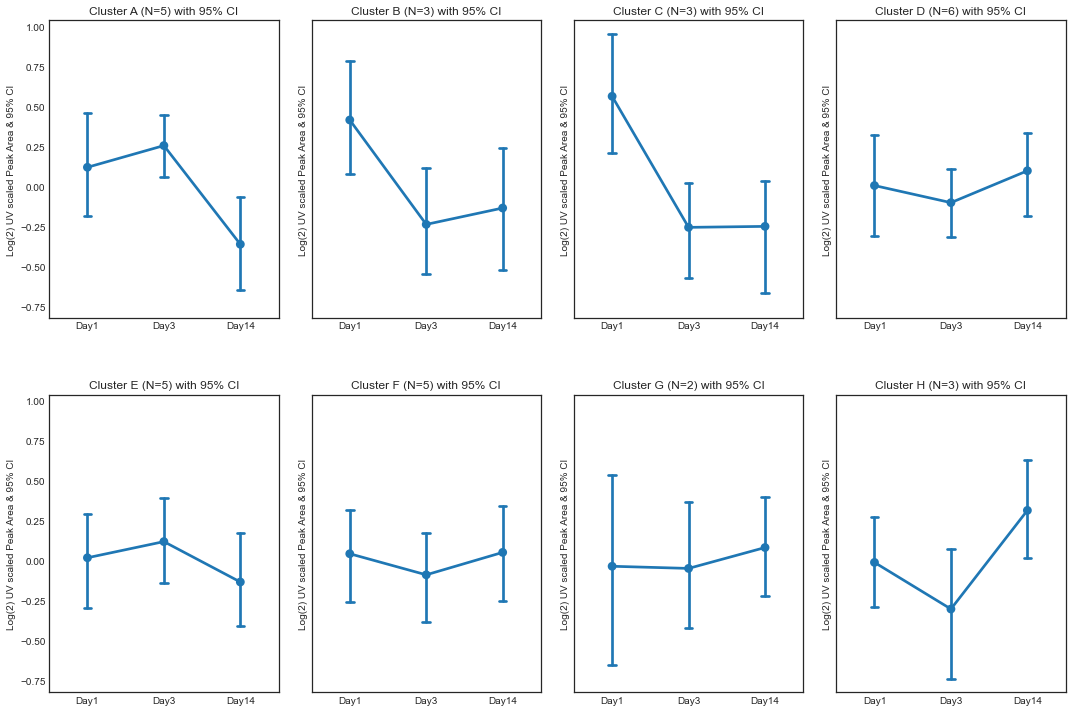

In [16]:
polarDendro.getClusterPlots(plot_type='mean', column_numbers=4, log_data=(True, 2), scale_data=True, impute_data=(False, 3), figSize=(15,10), y_axis_label=None, x_axis_rotation=0, ci=95, saveImage=True, imageFileName='clusterPlots_altitude_study.png', dpi=200)